In [1]:
# Lets import the dependencies firt
import pandas as pd # For reading data and storing it as pandas dataframe
import numpy as np  # For building neural networks and all the maths
import matplotlib.pyplot as plt

# Preprocessing: 

In [2]:
# Importing data
data_train = pd.read_csv('../input/mnist-digit-recognizer/train.csv')
# The above is the training dataset

# To see first 5 rows
data_train.head() # Since the data is imported as DataFrame by panas

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Now lets make them into numpy data
data = np.array(data_train)
# data.shape -> To check the shape of our data

# Alright it is a huge number, lets save them in variables
row, column = data.shape
row,column

(42000, 785)

In [4]:
# Alright now, lets just from here divide into training and test datasets
# Lets do 10% of it as test and 90% as train
ten_percent = int((1/10)*row)
ninty_percent = row - ten_percent
ten_percent, ninty_percent

(4200, 37800)

In [5]:
# Perfect, now if you saw the table given by data_train.head()
# our labels are at the 0th index
# Thus,
X = data_train.drop("label", axis = 1) # We do not need the labels for our set X, its just features
y = data_train["label"]
X.head(), y.head()#X_train.shape,y_train.shape # To see if we got the correct data

(   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0       0       0       0       0       0       0       0       0       0   
 1       0       0       0       0       0       0       0       0       0   
 2       0       0       0       0       0       0       0       0       0   
 3       0       0       0       0       0       0       0       0       0   
 4       0       0       0       0       0       0       0       0       0   
 
    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0       

In [6]:
# Now lets divide the training and test sets
X_train = X[:ninty_percent]
y_train = y[:ninty_percent]
X_train.shape, y_train.shape # To see if we got correct number of elements

((37800, 784), (37800,))

In [7]:
# Splitting into test set
X_test = X[ninty_percent:]
y_test = y[ninty_percent:]
X_test.shape, y_test.shape

((4200, 784), (4200,))

In [8]:
# We need to transpose our X_train and X_test, because it is easier to work with columns
X_train = X_train.T
X_test = X_test.T
X_train.shape, X_test.shape

((784, 37800), (784, 4200))

# 1. Initial parameters (random weights and biases)

In [9]:
# Now we have done the preprocessing
# Lets create the Neural Network
# 1. Randomly initialize the initial parameters (weights and biases)
''' We are using 1 input layer with 784 neurons/inputs, 1 hidden layer(10 neurons) 
    and 1 output layer with 10 neurons (numbers between 0-9). Thus, we'll have 2 connecting synapses '''

def init_params():
    ''' First synapse between input and hidden layer '''
    w1 = np.random.rand(10,784) # random array with 10 rows and 784 columns since each hidden layer is connected to 784 input neurons
    b1 = np.random.rand(10, 1) # 10 random numbers as biases
    
    '''Second synapse between hidden layer and output layer'''
    w2 = np.random.rand(10, 10) # 10 hidden neurons, each connected to 10 output neurons
    b2 = np.random.rand(10, 1)
    
    return w1, w2, b1, b2

# 2. Forward Propagation:

**ReLU:** The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

Source: [https://www.google.com/search?q=relu+function&oq=Relu+function&aqs=chrome.0.0i131i433i512j0i512l9.4472j0j7&sourceid=chrome&ie=UTF-8](http://)

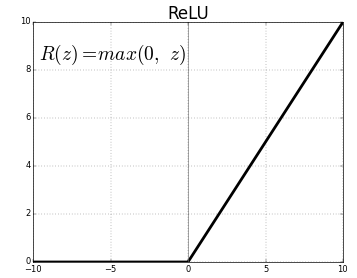

In [10]:
# The ReLU function for activation
def ReLu(z):
    R = np.maximum(0, z) # It would go through each element and apply ReLU function
    return R

**Softmax:** Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

Source: [https://machinelearningmastery.com/softmax-activation-function-with-python/](http://)

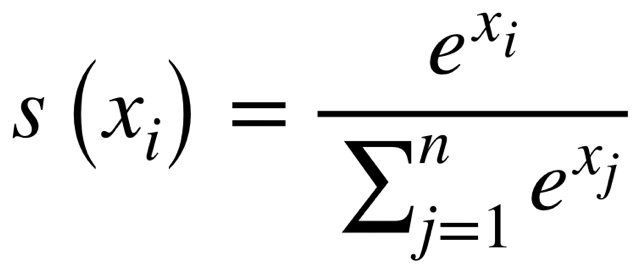



In [11]:
# The softmax function implementation
def softmax(x):
    s = exp(x)/np.sum(exp(x))
    return s

In [12]:
# The function for forward propagation (refer the math (provided above), behind neural networks)
def forw_prop(X, w1, w2, b1, b2): # our input X, and random weights and biases
    '''Input layer to hidden layer'''
    Z1 = w1.dot(X) + b1  # Multiplying the weight with the input and adding the bias
    A1 = ReLu(Z1)
    
    '''Hidden layer to output layer'''
    Z2 = w2.dot(A1) + b2   # Now we should use A1 instead of X, because our data is converted to A1
    A2 = softmax(Z2)  # We use softmax activation for the second synapse
    
    return Z1, Z2, A1, A2

# 3.Back Propagation

**One-Hot Encoding:** One hot encoding simply makes different columns for different labels, and puts 0s and 1s to recognize the label. For example if we have 3 labels say 0 1 and 2, then it will create 3 columns 0, 1, 2 and then if the label is 0 then 1 at 0's column and 0s at other corresponding columns. (Also works for strings)

In [13]:
# One-hot Encoder function
def one_hot_encode(x):
    encoded_x = np.zeros((x.size, x.max()+1)) # The maximum no. there are + 1(starts from 0 so) column 
    # Since size would be huge (in thousands) but our numbers are just 0-9 hence 9+1 = 10, columns, 1 for each
    
    encoded_x[np.arange(x.size), x] = 1 # Puts 1 on the particular column for ex. for 0 at 0th column, for 1 at 1st column and so on
    # np.arange(size) will go to each row and at the x index put 1, for ex. at 0th column 1 for 0 and for 1 at 1st column and so o
    
    # We will now tranpose it so each column would be our label, like we did we X_train, so it should be same for both
    encode_x = encode_x.T    
    return encode_x

In [14]:
# This is the function to find the derivative of ReLU function since we are backpropagating
def derv_relu(x):
    return x > 0
'''Boolean returns 1 if true and 0 if false. Look at the ReLU function graph above.
The slope is just 1 when x > 0 and 0 otherwise. '''


'Boolean returns 1 if true and 0 if false. Look at the ReLU function graph above.\nThe slope is just 1 when x > 0 and 0 otherwise. '

In [15]:
# Back propagating function
def back_prop(y, X, Z1, Z2, A1, A2, W2):
    encoded_y = one_hot_encode(y)
    n = y.size
    dZ2 = A2 - encoded_y
    dW2 = 1/n * dZ2.dot(A1.T)
    db2 = 1/n * np.sum(dZ2, 2) # On the second axis or columns
    
    dZ1 = W2.T.dot(dZ2) * derv_relu(Z1)
    dW2 = 1/n * dZ1.dot(X.T)
    db1 = 1/n * np.sum(dZ1, 2)
    
    return dW1, dW2, db1, db2 # We just change the weights and biases backpropagating so

In [16]:
# Now lets update the parameters
def update(W1, W2, dW1, dW2, b1, b2, db1, db2, alpha): # alpha is the learning_rate
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    
    return W1, W2, b1, b2

# 4. The gradient descent

In [17]:
# Now lets code up the gradient descent using above functions 
'''I did not mention any particular type of gradient descent'''
def gradient_descent (X, y, epochs, alpha):
    w1, w2, b1, b2 = init_params()
    for i in range(epochs):
        Z1, Z2, A1, A2 = forw_prop(X, w1, w2, b1, b2)
        dw1, dw2, db1, bd2 = back_prop(y, X, Z1, Z2, A1, A2, w2)
        w1, w2, b1, b2 = update(w1, w2, dw1, dw2, b1, b2, db1, db2, alpha)